# Piecewise Linear Regression

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Dataset Generation

In [2]:
def f(x):
  return (x-1)*(x-5)*(x-11) + 10*np.random.randn()

In [3]:
x = [i/10 for i in range(120)]
y = [f(i) for i in x]

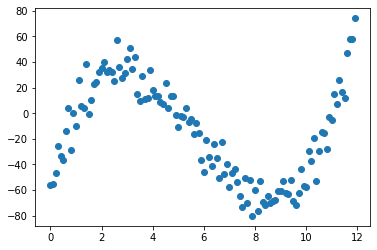

In [4]:
plt.scatter(x,y)

## Piecewise Linear Approximation
  The function is represented as the y-axis intercept and slopes in the intervals of size `a`. Hence the function is approximated till `x = (len(m)-1)*a`

In [5]:
# Function to evaluate approximation with slopes m[] and interval a at point x
def eval(x,m,a):
  bucket = int(x/a) + 1
  if bucket >= len(m):
    w = m[-1]
    b = a*(sum(m) - (len(m)-1)*w)
  else:
    w = m[bucket]
    b = a*(sum(m[:bucket+1]) - bucket*w)
  return w*x + b

In [6]:
lr = 0.05 # Learning Rate
iter = 1000

In [7]:
m = [np.random.randn() for _ in range(9)]   # Initialising with random slopes
costs = []

The following code optimizes the loss function which is the sum of averages of squares of distance from the actual data and the weighted squared difference of adjacent slopes (To make the approximation smooth)
<center>
<pre>
L = L<sub><i>dist</i></sub> + a * L<sub><i>smooth</i></sub> ; a = 0.002
</pre>
</center>
<code>a</code> is very small since we want the distance to be the priority over smoothness.

In [8]:
min_cost = float('inf')
min_m = []
a = 1.5
for e in range(1,iter+1):
  new = [0]*len(m)
  cost1 = 0
  cost2 = 0
  for i in range(len(x)):
    pred = eval(x[i], m, a)
    cost1 += ((y[i]-pred)**2)/len(x)
    for j in range(len(m)):
      cost2 += 0 if j<=1 else 0.002*((m[j]-m[j-1])**2)/(2*len(m)-4)
      if j==int(x[i]/a)+1:
        new[j] += 2 * (pred - y[i]) * (x[i]-int(x[i]/a)) / len(x)
      else:
        new[j] += 2*(pred - y[i]) / len(x)
      if j>1:
        new[j] += (0.002)*(m[j]-m[j-1])/(len(m)-2)
      if j<len(m)-1 and j>0:
        new[j] += (0.002)*(m[j]-m[j+1])/(len(m)-2)
  m = [i-lr*j for i,j in zip(m,new)]
  if(cost1 + cost2<min_cost):
    min_cost = cost1 + cost2
    min_m = m
  costs.append(cost1 + cost2)
  print("Epoch: {} => Cost: {}".format(e,cost1 + cost2))

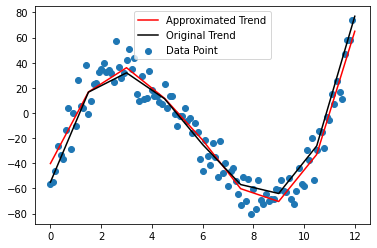

In [9]:
ydash = [eval(a*i, min_m, a) for i in range(0,int(12/a)+1)]
plt.scatter(x,y,label="Data Point")
plt.plot([a*i for i in range(0,int(12/a)+1)],ydash, color="r",label="Approximated Trend")
plt.plot([a*i for i in range(0,int(12/a)+1)],[(a*i-1)*(a*i-5)*(a*i-11) for i in range(0,int(12/a)+1)], color="k",label="Original Trend")
plt.legend()

## Cost Convergence

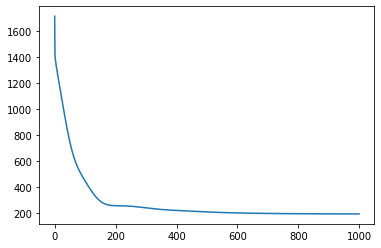

In [10]:
plt.plot(range(len(costs)),costs)